<h2><center>Protein sequence analysis</center></h2>

<h2>Summary:</h2>
<p> This Jupyter notebook is a detailed description of project given, which consist of data cleaning involving eliminating null values, removing or correcting invalid entries, creating and merging dataframes which are then used for better data visualization. It also consist of use of machine learning by choosing a classification model based on a training data. Additionally, high dimesion visualizations are developed to further understand the properties about various metrics of the dataset. </p>

<h2> Problem Definition:</h2>
<p> The problem consist of various inconsistencies in the available datasets which need to be dealt with to design the required Machine Learning model as well as exhibiting required data visualization. The results of these various computations can be used to build new vaccines and serological tests which otherwise is quite a time consuming process. Hence, the available data need to be looked into properly to search for any disparities and errors and remove them to clear a way for the development of required vaccines to elicit an immunity system response to various external or internal infections and diseases which can prove to be very beneficial in the long run in health sector. </p>

<b>-----------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

 In the below three cells, we are importing python libraries that are necessary to perform all the tasks mentioned in the coursework brief.

In [1]:
import collections
from collections import Counter
import copy
import datetime
import os
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import entropy
import seaborn as sns

In [3]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

We are checking in the below cell whether both the dataset files are present in the current directory.

In [4]:
def check_datasets_presence():
    if not os.path.exists(os.path.join(os.getcwd(),"proteins.csv")):
        print('File proteins.csv is not present in the current directory.')
    if not os.path.exists(os.path.join(os.getcwd(),"Sp_epitopes.csv")):
        print('File Sp_epitopes.csv is not present in the current directory.')
    else:
        print('Both data files are present in the current directory. Proceeding with further tasks.')

check_datasets_presence()

Both data files are present in the current directory. Proceeding with further tasks.


#### Both proteins and Sp_epitopes datasets are loaded in a dataframe and are expected to be present in the current directory

In [5]:
protein_df = pd.read_csv(os.path.join(os.getcwd(),"proteins.csv"))
epitope_df = pd.read_csv(os.path.join(os.getcwd(),"Sp_epitopes.csv"))

In [6]:
# Checking the dimensions of both the dataframes loaded above

print('protein_df dimensions ==>', protein_df.shape)
print('epitope_df dimensions ==>', epitope_df.shape)

protein_df dimensions ==> (14194, 10)
epitope_df dimensions ==> (7105, 18)


In [7]:
# Checking the columns of both the dataframes loaded above

print('protein_df columns ==>', protein_df.columns)
print('*'*125)
print('epitope_df columns ==>', epitope_df.columns)

protein_df columns ==> Index(['TSeq_seqtype', 'TSeq_accver', 'TSeq_taxid', 'TSeq_orgname',
       'TSeq_defline', 'TSeq_length', 'TSeq_sequence', 'UID', 'DB',
       'TSeq_sid'],
      dtype='object')
*****************************************************************************************************************************
epitope_df columns ==> Index(['pubmed_id', 'year', 'epit_name', 'epitope_id', 'evid_code',
       'epit_struc_def', 'sourceOrg_id', 'protein_id', 'epit_seq', 'start_pos',
       'end_pos', 'n_assays', 'host_id', 'bcell_id', 'assay_type',
       'n_Positive', 'n_Negative', 'assay_class'],
      dtype='object')


In [8]:
print('proteins_df column types ==>\n', protein_df.dtypes)
print('*'*100)
print('epitope_df columns types==> \n', epitope_df.dtypes)

proteins_df column types ==>
 TSeq_seqtype     object
TSeq_accver      object
TSeq_taxid        int64
TSeq_orgname     object
TSeq_defline     object
TSeq_length       int64
TSeq_sequence    object
UID              object
DB               object
TSeq_sid         object
dtype: object
****************************************************************************************************
epitope_df columns types==> 
 pubmed_id          int64
year               int64
epit_name         object
epitope_id         int64
evid_code         object
epit_struc_def    object
sourceOrg_id       int64
protein_id        object
epit_seq          object
start_pos          int64
end_pos            int64
n_assays           int64
host_id           object
bcell_id          object
assay_type        object
n_Positive         int64
n_Negative         int64
assay_class       object
dtype: object


In [9]:
protein_df.head()

,TSeq_seqtype,TSeq_accver,TSeq_taxid,TSeq_orgname,TSeq_defline,TSeq_length,TSeq_sequence,UID,DB,TSeq_sid
0,protein,0704243A,11320,Influenza A virus,hemagglutinin HA1,328,EYLPGNDNSTATLCLGHHAVPNGTLVKTITNDQIEVTNATELVQSS...,0704243A,NCBI protein,NaN
1,protein,P06914.1,73239,Plasmodium yoelii yoelii,RecName: Full=Circumsporozoite protein; Short=...,367,MKKCTILVVASLLLVDSLLPGYGQNKSVQAQRNLNELCYNEENDNK...,P06914.1,NCBI protein,NaN
2,protein,P03449.2,383586,Influenza A virus (A/Memphis/1/1971(H3N2)),RecName: Full=Hemagglutinin; Contains: RecName...,566,MKTIIALSHIFCLVLGQYLPGNDNSTATLCLGHHAVPNGTLVKTIT...,P03449.2,NCBI protein,NaN
3,protein,P04664.1,387147,Influenza A virus (A/England/878/1969(H3N2)),RecName: Full=Hemagglutinin; Contains: RecName...,328,QDLPGNDNSTATLCLGHHAVPNGTLVKTITNDQIEVTNATELVQSS...,P04664.1,NCBI protein,NaN
4,protein,ABF83447.1,370128,Influenza A virus (A/Northern Territory/60/196...,hemagglutinin [Influenza A virus (A/Northern T...,566,MKTIIALSYIFCLALGQDLPGNDNNTATLCLGHHAVPNGTLVKTIT...,ABF83447.1,NCBI protein,gnl|NIGSP|NIGSP-BK-00018.HAp1


In [10]:
epitope_df.head()

,pubmed_id,year,epit_name,epitope_id,evid_code,epit_struc_def,sourceOrg_id,protein_id,epit_seq,start_pos,end_pos,n_assays,host_id,bcell_id,assay_type,n_Positive,n_Negative,assay_class
0,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,49,2,"96,069,606","16,746,431,674,584","34,34",2,0,"1,1"
1,26911649,2016,spy0469 P197,510898,Representative selection,Epitope containing region/antigenic site,1314,AAfK33481.1,AETTEVEPKTDISEA,197,211,1,9606,2728090,550,0,1,-1
2,26911649,2016,spy0469 P14,511327,Representative selection,Epitope containing region/antigenic site,1314,AAK33481.1,ALSLVPLATAQAQEW,14,28,1,9606,2727907,550,0,1,-1
3,26911649,2016,spy0469 P91,511425,Representative selection,Epitope containing region/antigenic site,1314,AAK33481.1,ANYNQHGQATNLTVQ,91,105,1,9606,2727984,550,0,1,-1
4,26911649,2016,spy0469 P137,511599,Representative selection,Epitope containing region/antigenic site,1314,AAK33481.1,AP453PATPSDVPTTPFA,137,151,1,9606,2728030,550,0,1,-1


## M1: A short summary of the dataset.

We have two datasets named Sp_epitopes.csv and proteins.csv. We will discuss in brief about both of them. </br>
</br>
    1) <b>Sp_epitopes.csv</b>: This dataset contains 18 columns and contains information about B-cell epitopes of the parasite Streptococcus pyogenes. B-cell protein fragments that are associated with the immune response of a given host. The file contains a total of 7105 samples. </br>
    2) <b>proteins.csv</b>: This dataset contains 10 columns and contains data about the proteins that are associated to the several pathogens. This file contains information that includes but is not limited to the proteins containing the epitopes from Sp_epitopes. We have 14194 samples present in the dataset.

## M2:  Adequately join the protein sequences onto the epitopes table
The two datasets have been joined on column protein_id (from protein_df) and UID (from epitope_df). We have created a left join to combine both datasets

In [11]:
final_df = pd.merge(epitope_df, protein_df, left_on='protein_id', right_on='UID', how="left")

In [12]:
final_df.head()

,pubmed_id,year,epit_name,epitope_id,evid_code,epit_struc_def,sourceOrg_id,protein_id,epit_seq,start_pos,...,TSeq_seqtype,TSeq_accver,TSeq_taxid,TSeq_orgname,TSeq_defline,TSeq_length,TSeq_sequence,UID,DB,TSeq_sid
0,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,...,protein,AAB20743.1,1314.0,Streptococcus pyogenes,"streptokinase, SKase [Streptococcus pyogenes, ...",414.0,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592
1,26911649,2016,spy0469 P197,510898,Representative selection,Epitope containing region/antigenic site,1314,AAfK33481.1,AETTEVEPKTDISEA,197,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,26911649,2016,spy0469 P14,511327,Representative selection,Epitope containing region/antigenic site,1314,AAK33481.1,ALSLVPLATAQAQEW,14,...,protein,AAK33481.1,160490.0,Streptococcus pyogenes M1 GAS,putative 42 kDa protein [Streptococcus pyogene...,389.0,MIITKKSLFVTSVALSLVPLATAQAQEWTPRSVTEIKSELVLVDNV...,AAK33481.1,NCBI protein,gnl|uohsc|SPy0469
3,26911649,2016,spy0469 P91,511425,Representative selection,Epitope containing region/antigenic site,1314,AAK33481.1,ANYNQHGQATNLTVQ,91,...,protein,AAK33481.1,160490.0,Streptococcus pyogenes M1 GAS,putative 42 kDa protein [Streptococcus pyogene...,389.0,MIITKKSLFVTSVALSLVPLATAQAQEWTPRSVTEIKSELVLVDNV...,AAK33481.1,NCBI protein,gnl|uohsc|SPy0469
4,26911649,2016,spy0469 P137,511599,Representative selection,Epitope containing region/antigenic site,1314,AAK33481.1,AP453PATPSDVPTTPFA,137,...,protein,AAK33481.1,160490.0,Streptococcus pyogenes M1 GAS,putative 42 kDa protein [Streptococcus pyogene...,389.0,MIITKKSLFVTSVALSLVPLATAQAQEWTPRSVTEIKSELVLVDNV...,AAK33481.1,NCBI protein,gnl|uohsc|SPy0469


In [13]:
final_df.shape

(7105, 28)

## M3: Remove invalid observations:

### M3 i) Those without corresponding protein sequences
We have removed all the rows from the combined dataset where TSeq_sequence column has null values using 'notna()' method of pandas.

In [14]:
# M3 1)
new_df = final_df[final_df['TSeq_sequence'].notna()]

In [15]:
new_df.shape

(7100, 28)

### M3 ii) those for which the epitope substring is not located in the correct position of the protein string (based on start_pos and end_pos);

All the rows are removed from the dataframe where the epitope substring (epit_seq) is not positioned correctly in the protein string (TSeq_sequence). Two other columns (start_pos, end_pos) are also used to perform this task. <br>
A generic function <b>get_epitome_substring_pos</b> is written that return as True if epitope string is correctly positioned or np.nan if it is not. <br>
Further, a new column 'sub_located' is added to the dataframe which inhibits the results returned from <b>get_epitome_substring_pos</b> function. The rows having np.nan values are then removed as these are those rows in which epitope substring is not correctly positiones. This new column is finally dropped after performing the task.

In [16]:
def get_epitome_substring_pos(epit_seq, start_pos, end_pos, TSeq_sequence):
    try:
        epit_seq = epit_seq.strip()
        TSeq_sequence = TSeq_sequence.strip()
        start = start_pos - 1
        sub = TSeq_sequence[start:end_pos]
        
        return True if epit_seq == sub else np.nan
        
    except Exception as e:
        print("Error in get_epitome_substring_pos", str(e), str(datetime.datetime.now()))
        return np.nan

new_df['sub_located'] = new_df.apply(lambda x: get_epitome_substring_pos(x.epit_seq, x.start_pos, 
                                                                                 x.end_pos, x.TSeq_sequence), axis=1)
new_df = new_df[new_df['sub_located'].notna()]
del new_df['sub_located']
new_df.shape

(7094, 28)

### M3 iii) those with start_pos < 8 or with end_pos > (TSeq_length – 8 )

All the rows are removed from the dataframe where the start_pos have value less than 8 OR end_pod have values greater than (TSeq_length – 8).<br>
<b> '~' </b> is used to remove rows from the dataframe that doesn't follow the conditions specified

In [17]:
# M3 3)

new_df = new_df[~((new_df.start_pos < 8) | (new_df.end_pos > new_df.TSeq_length - 8))]
new_df.shape

(6826, 28)

### M3 iv) those containing any non-specific aminoacid letters (namely B,J,X or Z) in the epitope sequence.

All the rows are removed from the dataframe where the epit_seq string contains any of these four alphabtes (B,J,X or Z). A generic function <b>remove_aminoacid_letters</b> is written that takes epit_seq as an an parameter. <br>
The function returns True or False whether epitope_sequence needs to be removed from the dataframe based on the presence of these 4 alphabets.

In [18]:
def remove_aminoacid_letters(epit_seq):
    try:
        for e in epit_seq:
            if e in ['B', 'J', 'X', 'Z']:
                return False
            else:
                continue
        return True
    except Exception as e:
        print("Error in remove_aminoacid_letters function", str(e))
        return False

new_df['letter_mismatch'] = new_df.epit_seq.apply(lambda x: remove_aminoacid_letters(x))
new_df = new_df[~(new_df.letter_mismatch==False)]
del new_df['letter_mismatch']
new_df.shape

(6826, 28)

# M4: Calculate  the  Class attribute for this data set based on the number of positive and negative assays (if n_Positive >= n_Negative then Class = 1, otherwise Class = 0)

A new column <b>'class'</b> is added to the dataframe that will be used in the prediction through trained machine learning classifiers in the next tasks. <br>
We have used lambda function which give this class column value 1 if n_positive>=n_Negative and value 0 if this is the opposite case.

In [19]:
new_df['class'] = new_df.apply(lambda x: 1 if x.n_Positive >= x.n_Negative else 0, axis=1)
new_df.shape

(6826, 29)

## M5:  Develop high-quality visualisations of the main characteristics of the resulting joined data set.  The minimal  requirement here is

### M5 i) a graphical investigation of Class balance

A balanced dataset is a dataset where each output/target class is represented by the approximately same number of input samples. We have build some bar and pie chart plots that will help us to assess the extent of class imbalance in the dataset.<br>
We uses seaborn library to create the visualization.

<AxesSubplot:title={'center':'Class Imbalance'}, xlabel='class', ylabel='count'>

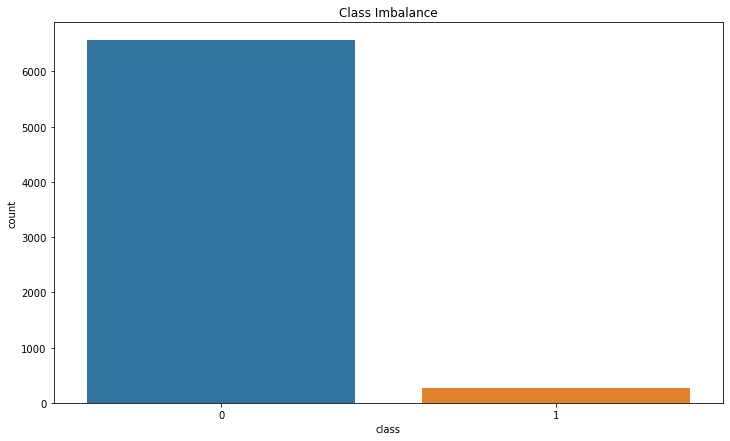

In [20]:
a4_dims = (12, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax.set_title('Class Imbalance')
ax.set_ylabel('Count')
ax.set_xlabel('Class')
sns.countplot(new_df['class'], ax=ax, palette=["tab:blue", "tab:orange"])

<b>It could be clearly seen that we have more number of Negative class (0) rows as compared to the Positive class (1). The class imbalance could be seen in the bar plot above where we have approx 6500 samples belonging to class 0 and approx 260 sample to class 1. </b>

We have used dataframes 'groupby' method to count the instances of both classes in the dataset.  dataframe.plot is used to build a pie chart to visualized the extent of class balance

<AxesSubplot:title={'center':'Class Distribution'}>

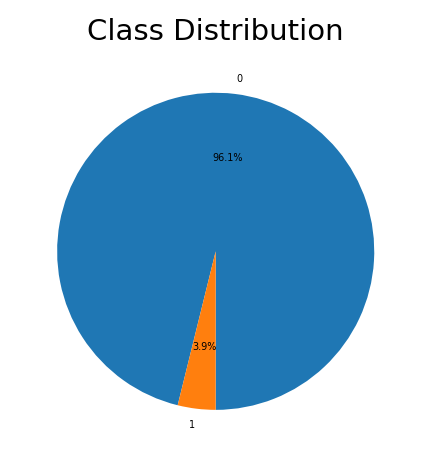

In [21]:
class_count_df = new_df[['TSeq_sequence', 'class']].groupby('class',  as_index=False).count()

fig = plt.figure(figsize=(3,3), dpi=175)
ax = plt.subplot(111)
class_count_df.rename(columns={'TSeq_sequence': 'Class_Count'}).Class_Count.plot(kind='pie',
                                                                                 label='',
                                                                                 ax=ax, autopct='%1.1f%%',
                                                                                 startangle=270, fontsize=4,
                                                                                title='Class Distribution')

<b> Class imbalance is shown through a pie chart as well where we can see that 96% of the total samples belong to Negative class whereas remaining 4% belongs to the positive class. </b>

### M5 ii) a graphical investigation of the distribution of epitope lengths;

We have calculated the lenght of each epit_seq by using python's inbuilt function 'len' that gives us the length of the string. A lambda function is applied on 'epit_seq' column and new column 'epitope_length' is created that have the length of respective epitope sequence.

In [22]:
epitome_length_df = copy.deepcopy(new_df)
epitome_length_df['epitope_length'] = new_df.epit_seq.apply(lambda x: len(x.strip()))

In [23]:
epitome_length_df.head()

,pubmed_id,year,epit_name,epitope_id,evid_code,epit_struc_def,sourceOrg_id,protein_id,epit_seq,start_pos,...,TSeq_taxid,TSeq_orgname,TSeq_defline,TSeq_length,TSeq_sequence,UID,DB,TSeq_sid,class,epitope_length
0,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,...,1314.0,Streptococcus pyogenes,"streptokinase, SKase [Streptococcus pyogenes, ...",414.0,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,1,8
2,26911649,2016,spy0469 P14,511327,Representative selection,Epitope containing region/antigenic site,1314,AAK33481.1,ALSLVPLATAQAQEW,14,...,160490.0,Streptococcus pyogenes M1 GAS,putative 42 kDa protein [Streptococcus pyogene...,389.0,MIITKKSLFVTSVALSLVPLATAQAQEWTPRSVTEIKSELVLVDNV...,AAK33481.1,NCBI protein,gnl|uohsc|SPy0469,0,15
3,26911649,2016,spy0469 P91,511425,Representative selection,Epitope containing region/antigenic site,1314,AAK33481.1,ANYNQHGQATNLTVQ,91,...,160490.0,Streptococcus pyogenes M1 GAS,putative 42 kDa protein [Streptococcus pyogene...,389.0,MIITKKSLFVTSVALSLVPLATAQAQEWTPRSVTEIKSELVLVDNV...,AAK33481.1,NCBI protein,gnl|uohsc|SPy0469,0,15
5,26911649,2016,spy0469 P211,511701,Representative selection,Epitope containing region/antigenic site,1314,AAK33481.1,APTSANRPVPNESAS,211,...,160490.0,Streptococcus pyogenes M1 GAS,putative 42 kDa protein [Streptococcus pyogene...,389.0,MIITKKSLFVTSVALSLVPLATAQAQEWTPRSVTEIKSELVLVDNV...,AAK33481.1,NCBI protein,gnl|uohsc|SPy0469,0,15
6,26911649,2016,spy0469 P126,512004,Representative selection,Epitope containing region/antigenic site,1314,AAK33481.1,ASATSQPTVPMAPPA,126,...,160490.0,Streptococcus pyogenes M1 GAS,putative 42 kDa protein [Streptococcus pyogene...,389.0,MIITKKSLFVTSVALSLVPLATAQAQEWTPRSVTEIKSELVLVDNV...,AAK33481.1,NCBI protein,gnl|uohsc|SPy0469,0,15


In [24]:
epitome_length_df.shape

(6826, 30)

The calculated epitope sequence length is visualized by plotting a histogram of the newly created column 'epitope_length'. We have used pandas.dataframe.plot to create a hist plot and different options such as figsize, title, ylabel, xlabel have been passed that adds more value and information to the histogram plot.

Text(0, 0.5, 'Count')

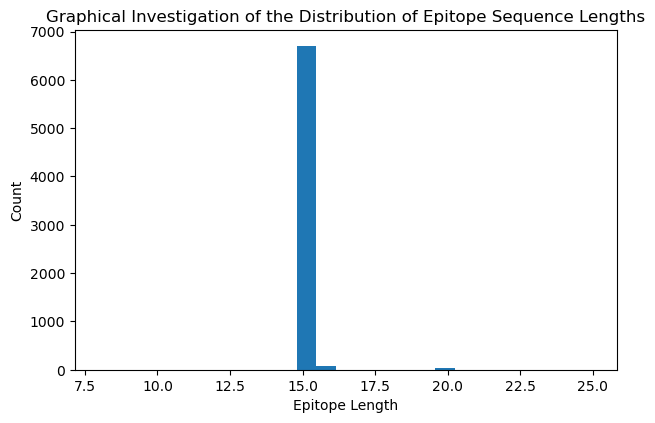

In [25]:
fig = plt.figure(figsize=(2,2), dpi=100)
ax = plt.subplot(111)
epitome_length_df['epitope_length'].plot(kind='hist', figsize=(7, 4.5),
                                      title='Graphical Investigation of the Distribution of Epitope Sequence Lengths',
                                      ax=ax, bins=25, fontsize=10)
plt.xlabel("Epitope Length")
plt.ylabel('Count')
# print(ax.bar_label(ax.containers[0]))

<b> It could be seen that out of 6826 around 6700 samples have an epitope sequence length of 15. Also there are few samples that have the sequence length of 16. There are very less number of samples that has a length of 20 </b>

### M5 iii) A grouped bar chart of the frequencies (%) of each aminoacid letter in Positive vs Negative observations.

We have made a comparison between the percentage of each aminoacid letter present in positive and negative class. We have created two different dataframes with each having specific class i.e positive and negative. 

In [26]:
frequency_df = epitome_length_df[['pubmed_id','epit_seq', 'class']]

In [27]:
class_positive_df = frequency_df.loc[frequency_df['class']==1]
class_negative_df = frequency_df.loc[frequency_df['class']==0]

In the below two cells, We are creating a list that will contain each individual aminoacid letter present in the epit_seq column. This list is then sorted so that alphabets are in correct order.
We have used 'Counter' from 'collections' library to create a dictionary that gives us the count of each element present in the list. This helped us in finding the total number of each letter present in the positive class dataframe. </br>
Similar approach is used to calculate the count of each aminoacid letter in the negative dataframe as well.

In [28]:
positive_amino_letter_list = list(class_positive_df.epit_seq)
new_positive_amino_letter_list = list()

for l in positive_amino_letter_list:
    for s in l:
        new_positive_amino_letter_list.append(s)

new_positive_amino_letter_list.sort()

pos_freq = dict(Counter(new_positive_amino_letter_list))

In [29]:
negative_amino_letter_list = list(class_negative_df.epit_seq)
new_negative_amino_letter_list = list()

for l in negative_amino_letter_list:
    for s in l:
        new_negative_amino_letter_list.append(s)

new_negative_amino_letter_list.sort()
neg_freq = dict(Counter(new_negative_amino_letter_list))

With the two dictionaries (pos_freq and neg_freq) containing the number of each aminoacid letter, we have created two different dataframes with two columns (AminoAcidLetter, Frequency). These two dataframes are then joined with each other with common column AminoAcidLetter to create a new dataframe final_amino_freq_df.

In [30]:
pos_frequency_df = pd.DataFrame(pos_freq.items(), columns=['AminoAcidLetter', 'Frequency_pos'])
neg_frequency_df = pd.DataFrame(neg_freq.items(), columns=['AminoAcidLetter', 'Frequency_Neg'])

In [31]:
final_amino_freq_df = neg_frequency_df.merge(pos_frequency_df, on='AminoAcidLetter', how='left')

In [32]:
final_amino_freq_df

,AminoAcidLetter,Frequency_Neg,Frequency_pos
0,A,11045,565.0
1,C,107,NaN
2,D,6513,387.0
3,E,7457,482.0
4,F,2617,10.0
5,G,5357,88.0
6,H,1791,31.0
7,I,4643,148.0
8,K,8271,457.0
9,L,8353,364.0


As we can see, there are some null values as well because letter 'C' is not present in any of the epit_seq for positive class. We have filled these null values with 0 so that we can calculate the percentage in the next step. </br>
A new column <b>Total_Frequency</b> is created that sums up the values of both Frequency_Neg and Frequency_pos columns showing us the cout of total frequency of each aminoacid letter. </br>
Finally, positive and negative percentages have been calculated for each letter by dividing them with overall letter frequency and <b>pos_percentage & neg_percentage</b> columns are generated. These columns are then used to get a visualization comparison in a grouped bar chart.

In [33]:
final_amino_freq_df = final_amino_freq_df.fillna(0)
final_amino_freq_df['Total_Frequency'] = final_amino_freq_df['Frequency_Neg'] + final_amino_freq_df['Frequency_pos']
final_amino_freq_df['pos_percentage'] = round((final_amino_freq_df['Frequency_pos']/final_amino_freq_df['Total_Frequency'])*100,2)
final_amino_freq_df['neg_percentage'] = round((final_amino_freq_df['Frequency_Neg']/final_amino_freq_df['Total_Frequency'])*100,2)

In [34]:
final_amino_freq_df

,AminoAcidLetter,Frequency_Neg,Frequency_pos,Total_Frequency,pos_percentage,neg_percentage
0,A,11045,565.0,11610.0,4.87,95.13
1,C,107,0.0,107.0,0.00,100.00
2,D,6513,387.0,6900.0,5.61,94.39
3,E,7457,482.0,7939.0,6.07,93.93
4,F,2617,10.0,2627.0,0.38,99.62
5,G,5357,88.0,5445.0,1.62,98.38
6,H,1791,31.0,1822.0,1.70,98.30
7,I,4643,148.0,4791.0,3.09,96.91
8,K,8271,457.0,8728.0,5.24,94.76
9,L,8353,364.0,8717.0,4.18,95.82


In [35]:
print('PRINTING THE TOP and LAST NEGATIVE AND POSITIVE AMINOACID LETTERS')
print(final_amino_freq_df.sort_values(by='neg_percentage', ascending=False)[['AminoAcidLetter', 'neg_percentage']].head(5))
print(final_amino_freq_df.sort_values(by='neg_percentage', ascending=True)[['AminoAcidLetter', 'neg_percentage']].head(5))
print('\n')
print('#'*100)
print('\n')
print(final_amino_freq_df.sort_values(by='pos_percentage', ascending=False)[['AminoAcidLetter', 'pos_percentage']].head(5))
print(final_amino_freq_df.sort_values(by='pos_percentage', ascending=True)[['AminoAcidLetter', 'pos_percentage']].head(5))

PRINTING THE TOP and LAST NEGATIVE AND POSITIVE AMINOACID LETTERS
   AminoAcidLetter  neg_percentage
1                C          100.00
4                F           99.62
19               Y           98.87
18               W           98.70
5                G           98.38
   AminoAcidLetter  neg_percentage
14               R           92.70
3                E           93.93
2                D           94.39
8                K           94.76
13               Q           94.83


####################################################################################################


   AminoAcidLetter  pos_percentage
14               R            7.30
3                E            6.07
2                D            5.61
8                K            5.24
13               Q            5.17
   AminoAcidLetter  pos_percentage
1                C            0.00
4                F            0.38
19               Y            1.13
18               W            1.30
5                G      

<AxesSubplot:title={'center':'Frequencies (%) of each aminoacid letter in Positive vs Negative observations'}, xlabel='AminoAcid Letter', ylabel='Percentage'>

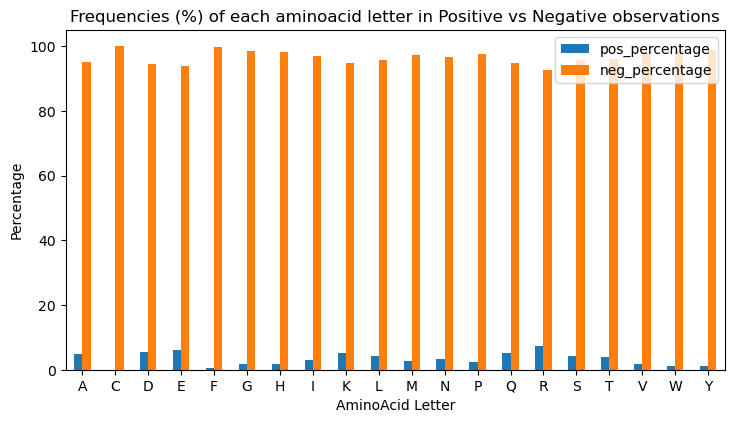

In [36]:
fig = plt.figure(figsize=(2,2), dpi=100)
ax = plt.subplot(111)
final_amino_freq_df[['AminoAcidLetter','pos_percentage', 'neg_percentage']].plot.bar(x='AminoAcidLetter', rot=0,  
                                                                                     figsize=(8.5, 4.5),
                                                                                     title='Frequencies (%) of each aminoacid letter in Positive vs Negative observations',
                                                                                     ylabel='Percentage', xlabel='AminoAcid Letter', ax=ax)

<b>We can see a grouped bar plot frequencies % of both positive and negative class. Orange bars depicts the negative samples whereas blue one are the positive one. As, it is inevitable that the frequency % of every letter in positive class is way less when compared to negative class. </br>
In the negative observations, letters <i>C, F, Y, W and G </i> have the maximum presence in the epitope sequence and letters <i>R, E, D, K and Q </i> have the minimum frequency %age in the epitopbe sequences. </br>
</br>
On the other hand, letters <i>R, E, D, K and Q </i> have the maximum frquency %age and letters <i>C, F, Y, W and G </i> have the least frequency percentage. </br>
</br>
This is an interesting observation to analyze that the results are exactly opposite to each other as the aminoacid letters that have maximum presence in negative samples have minimum %age in the positive sample and vice verca. </b>

## M6: Based on the resulting data set of (M1)-(M3), assemble an expanded data set, such that each aminoacid of each epitope sequence is represented in an individual row. This expanded data set must have a new variable called AA_window , containing a substring of length 15 centred on the specific aminoacid.

We created deepcopy of the original dataframe with class column generated above.

In [37]:
expanded_df = copy.deepcopy(new_df)

In [38]:
def get_AA_list(start_pos, end_pos):
    '''
    This function returns a list of numbers present between the start_pos and end_pos.
    eg: start_pos = 10, end_pos = 17, the function will return [10,11,12,13,14,15,16,17]
    '''
    AA_list = list(range(start_pos, end_pos+1))
    return AA_list

We have created a new column <b>AA_position</b> with the help of two other columns (x.start_pos, x.end_pos). </br>
Initially this column contains the list of numbers between start and end position where finally the dataframe is exploded by using <b>explode</b> function of pandas.dataframe. Explode converts each element of the list in AA_window to separate row in the dataframe.

In [39]:
expanded_df['AA_position'] = expanded_df.apply(lambda x: list(range(x.start_pos, x.end_pos+1)), axis=1)
expanded_df = expanded_df.explode('AA_position')

In [40]:
expanded_df

,pubmed_id,year,epit_name,epitope_id,evid_code,epit_struc_def,sourceOrg_id,protein_id,epit_seq,start_pos,...,TSeq_taxid,TSeq_orgname,TSeq_defline,TSeq_length,TSeq_sequence,UID,DB,TSeq_sid,class,AA_position
0,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,...,1314.0,Streptococcus pyogenes,"streptokinase, SKase [Streptococcus pyogenes, ...",414.0,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,1,42
0,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,...,1314.0,Streptococcus pyogenes,"streptokinase, SKase [Streptococcus pyogenes, ...",414.0,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,1,43
0,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,...,1314.0,Streptococcus pyogenes,"streptokinase, SKase [Streptococcus pyogenes, ...",414.0,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,1,44
0,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,...,1314.0,Streptococcus pyogenes,"streptokinase, SKase [Streptococcus pyogenes, ...",414.0,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,1,45
0,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,...,1314.0,Streptococcus pyogenes,"streptokinase, SKase [Streptococcus pyogenes, ...",414.0,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,1,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,7520963,1994,M5 protein p153,57290,Not determined,Epitope containing region/antigenic site,301449,P02977.2,SDSQTPDTKPGNKAVPGKGQ,417,...,301449.0,Streptococcus pyogenes serotype M5,"RecName: Full=M protein, serotype 5; Flags: Pr...",492.0,MARENTNKHYWLRKLKKGTASVAVALSVLGAGLVVNTNEVSAAVTR...,P02977.2,NCBI protein,NaN,0,432
7104,7520963,1994,M5 protein p153,57290,Not determined,Epitope containing region/antigenic site,301449,P02977.2,SDSQTPDTKPGNKAVPGKGQ,417,...,301449.0,Streptococcus pyogenes serotype M5,"RecName: Full=M protein, serotype 5; Flags: Pr...",492.0,MARENTNKHYWLRKLKKGTASVAVALSVLGAGLVVNTNEVSAAVTR...,P02977.2,NCBI protein,NaN,0,433
7104,7520963,1994,M5 protein p153,57290,Not determined,Epitope containing region/antigenic site,301449,P02977.2,SDSQTPDTKPGNKAVPGKGQ,417,...,301449.0,Streptococcus pyogenes serotype M5,"RecName: Full=M protein, serotype 5; Flags: Pr...",492.0,MARENTNKHYWLRKLKKGTASVAVALSVLGAGLVVNTNEVSAAVTR...,P02977.2,NCBI protein,NaN,0,434
7104,7520963,1994,M5 protein p153,57290,Not determined,Epitope containing region/antigenic site,301449,P02977.2,SDSQTPDTKPGNKAVPGKGQ,417,...,301449.0,Streptococcus pyogenes serotype M5,"RecName: Full=M protein, serotype 5; Flags: Pr...",492.0,MARENTNKHYWLRKLKKGTASVAVALSVLGAGLVVNTNEVSAAVTR...,P02977.2,NCBI protein,NaN,0,435


Further, as we have generated <b>'New_start_pos' and 'New_end_pos'</b> with the column AA_position created above. We have subtracted 7 from the AA_position to get New_start_pos and added 7 to AA_window to get New_end_pos. This will ensure that variable called <b>AA_window</b> , containing a substring of length 15 centred is on the specific aminoacid.

In [41]:
expanded_df['New_start_pos'] = expanded_df.AA_position.apply(lambda x: x-7)
expanded_df['New_end_pos'] = expanded_df.AA_position.apply(lambda x: x+7)

In [42]:
def get_AA_window(New_start_pos, New_end_pos, TSeq_sequence):
    '''
    This function returns the substring based on New_start_pos and New_end_pos where it gets 
    a slice of TSeq_sequence.
    '''
    try:
        sub = TSeq_sequence[New_start_pos-1:New_end_pos]
        return sub if sub else np.nan
        
    except Exception as e:
        print('Error in get_AA_windoe', str(e), str(datetime.datetime.now()))
        return np.nan

In [43]:
expanded_df['AA_window'] = expanded_df.apply(lambda x: get_AA_window(x.New_start_pos, x.New_end_pos, x.TSeq_sequence), axis=1)

In [44]:
expanded_df=expanded_df[["protein_id","epitope_id","AA_position","AA_window","class"]]

In [45]:
expanded_df.shape

(102659, 5)

## S1: Report the class imbalance of the expanded data set. To deal with this class imbalance you must keep all ‘positive class’ observations and randomly select 1.5*num_positive number of ‘negative class’ observations from the expanded data set; where num_positive is the number of positive observations.

We have again plotted two pie charts to visualize and measure the class imbalance.

<AxesSubplot:title={'center':'Class Distribution before Balance'}>

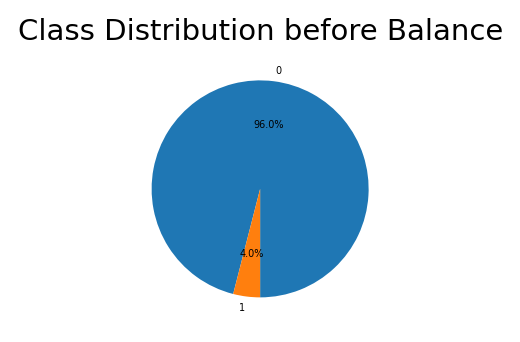

In [46]:
class_count_df_2 = expanded_df[['protein_id', 'class']].groupby('class').count()
fig = plt.figure(figsize=(2,3), dpi=175)
ax = plt.subplot(111)
class_count_df_2.rename(columns={'protein_id': 'Class_Count'}).Class_Count.plot(kind='pie', 
                                                                                autopct='%1.1f%%',
                                                                                label="",
                                                                                ax=ax,
                                                                                startangle=270,
                                                                                fontsize=4,
                                                                               title='Class Distribution before Balance')

<b> It could be seen that 96% of the samples belongs to class 0 and 4% belongs to class 1 </b>

We have separated two dataframes for samples belonging to each class. After that we have merged the two newly created dataframes to get the merged dataframes that contains positive and negative class.

In [47]:
random.seed(10)

num_of_negative_classes = int(expanded_df.loc[expanded_df['class']==1].count()[0]*1.5)

pos_df = expanded_df.loc[expanded_df['class']==1]
neg_df = expanded_df.loc[expanded_df['class']==0]
selected_neg_df = neg_df.sample(n = num_of_negative_classes)

In [48]:
final_merged_df = pd.concat([pos_df, selected_neg_df], ignore_index=True, sort=False)
final_merged_df.shape

(10250, 5)

<AxesSubplot:title={'center':'Class Distribution After Balance'}>

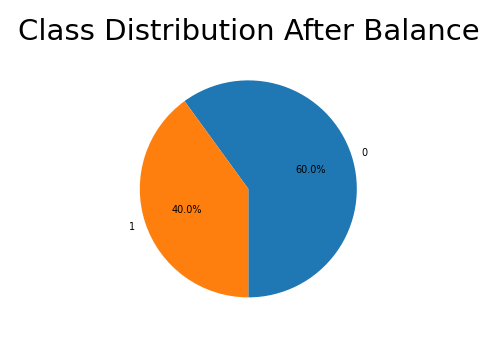

In [49]:
new_class_count_df_2 = final_merged_df[['protein_id', 'class']].groupby('class').count()
fig = plt.figure(figsize=(2,3), dpi=175)
ax = plt.subplot(111)

new_class_count_df_2.rename(columns={'protein_id': 'Class_Count'}).Class_Count.plot(kind='pie',
                                                                                    label="",
                                                                                    autopct='%1.1f%%',
                                                                                    ax=ax,
                                                                                    startangle=270,
                                                                                    fontsize=4,
                                                                                   title='Class Distribution After Balance')

<b> As we can see, out dataset is not highly imbalanced now as we have 60% of the samples belonging to class 0 whereas 40% belongs to class 1. This dataset have good number of samples belonging to both classes and we can train a classifier based on this dataset to get high accuracy performance </b>

## S2: Calculation of features related to the letters in the AA_window sequences calculated in (M5) :- 20 features for the frequency of each individual letter; - 400 features related to the frequency of each possible pair of letters.

We have created a deepcopy of the merged dataframe that contains both class0 and class1.

In [50]:
sequnce_df = copy.deepcopy(final_merged_df)

In the below cell, we have taken all the unique aminoacid letters from the AA_window column. These will help us to create other features in the dataset.

In [51]:
unique_letters = sorted(list(set([i for g in [list(i) for i in sequnce_df.AA_window] for i in g])))
pair_letter_list = [f'{l}{i}' for l in unique_letters for i in unique_letters]
print('Count of Unique Alphabets', len(unique_letters))
print('Count of Unique Alphabets pairs', len(pair_letter_list))

Count of Unique Alphabets 20
Count of Unique Alphabets pairs 400


<b> We can see that, column AA_window contains 20 unique letters. We have also created pairs of these letters with each other to form the attributes(predictors) for our dependent variable 'class'.

In the below two cells, we have created new 420 columns through the use of different data structures such as lists, dictionaris and tuples.</br>
All the samples were first converted into list of dictionaries and then this list is iterated for each element to add new keys (individual letters and pairs). The values are intially set to 0 which will be changed afterwards.

In [52]:
list_of_dicts = sequnce_df.to_dict('records')
new_dict_with_letters = list()

for dic in list_of_dicts:
    for l in unique_letters:
        dic[l] = 0
    for p in pair_letter_list:
        dic[p] = 0
    new_dict_with_letters.append(dic)

Each element of new list of dictionaries now have 425 keys. We have updated the values of newly added keys by diving the total occurance of each aminoacid letter in 'AA_window' column by 15 and presence of each pair by total number of pairs i.e. 200.

In [55]:
frequency_feature_list = list()
for dic_1 in new_dict_with_letters:
    dic = copy.deepcopy(dic_1)
    pair_list = list()
    AA_window = dic.get('AA_window')
    letter_count_dict = dict(Counter(AA_window))
    for key, value in letter_count_dict.items():
        dic[key] = value/15
    
    for i in range(0, len(AA_window)):
        if len(AA_window[i:i+2]) == 2:
            pair = AA_window[i:i+2]
            pair_list.append(pair)    
        else:
            pass
    
    pair_count_dict = dict(Counter(pair_list))
    for p_key, p_value in pair_count_dict.items():
        dic[p_key] = p_value/400
    
    frequency_feature_list.append(dic)

The list of dictionaries are then directly converted to new pandas dataframe named 'alphabet_pair_final_df'.

In [56]:
alphabet_pair_final_df = pd.DataFrame(frequency_feature_list)
alphabet_pair_final_df

,protein_id,epitope_id,AA_position,AA_window,class,A,C,D,E,F,...,YM,YN,YP,YQ,YR,YS,YT,YV,YW,YY
0,AAB20743.1,114463,42,LKFFEIDLTSRPAHG,1,0.066667,0.0,0.066667,0.066667,0.133333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0,0.0
1,AAB20743.1,114463,43,KFFEIDLTSRPAHGG,1,0.066667,0.0,0.066667,0.066667,0.133333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0,0.0
2,AAB20743.1,114463,44,FFEIDLTSRPAHGGK,1,0.066667,0.0,0.066667,0.066667,0.133333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0,0.0
3,AAB20743.1,114463,45,FEIDLTSRPAHGGKT,1,0.066667,0.0,0.066667,0.066667,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0,0.0
4,AAB20743.1,114463,46,EIDLTSRPAHGGKTE,1,0.066667,0.0,0.066667,0.133333,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10245,WP_033888368.1,523923,170,LSPYVSDLDLSEIDI,0,0.000000,0.0,0.200000,0.066667,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0025,0,0.0
10246,BAQ51774.1,517741,115,VFGWNHFLRQDSGKT,0,0.000000,0.0,0.066667,0.000000,0.133333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0,0.0
10247,WP_032461108.1,518955,199,STATANGIPGLHFPT,0,0.133333,0.0,0.000000,0.000000,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0,0.0
10248,KGE60983.1,527900,198,VPTPKAAETTEVEPK,0,0.133333,0.0,0.000000,0.200000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0,0.0


## S3: Splitting of the expanded dataset into training (80%) and testing (20%) set based on the protein_id value (i.e. all epitopes with the same protein_id should be under the same split) after M5.

Before splitting the dataset into training and testing sets, we have shuffled the dataset so that the splitting doesn't lead to class biassed in the releative training and testing datasets.

In [57]:
shuffled_df = alphabet_pair_final_df.sample(frac=1)

In [58]:
shuffled_df

,protein_id,epitope_id,AA_position,AA_window,class,A,C,D,E,F,...,YM,YN,YP,YQ,YR,YS,YT,YV,YW,YY
9396,WP_041174298.1,523650,76,DASAETNSNSLVNAD,0,0.200000,0.0,0.133333,0.066667,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0,0.0
6218,WP_032464869.1,520055,365,YLENYSKLTATINAL,0,0.133333,0.0,0.000000,0.066667,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0025,0.0,0.0,0,0.0
147,AAQ94545.1,35679,97,TAELTSEKKEHEAEN,1,0.133333,0.0,0.000000,0.333333,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0,0.0
5341,WP_041174322.1,517956,415,VTKDFDVIRNVIKDN,0,0.000000,0.0,0.200000,0.000000,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0,0.0
4807,WP_032464869.1,514580,326,EFSTERESLIAEIDE,0,0.066667,0.0,0.066667,0.333333,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,WP_029714098.1,528936,328,ISDASRQGLRRDLDA,1,0.133333,0.0,0.200000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0,0.0
7007,WP_041174322.1,530023,518,SPFSTVIPLGANSRN,0,0.066667,0.0,0.000000,0.000000,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0,0.0
4064,P02977.2,4739,345,RRDLDASREAKKQVE,1,0.133333,0.0,0.133333,0.133333,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0,0.0
520,BAQ50613.1,519680,28,ESAEKEEKKSEDKKK,1,0.066667,0.0,0.066667,0.333333,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0,0.0


The logic has been applied in such way that samples belonging to each protein ID must belong to eitheer training or testin set. </br>
We have taken all the unique protein_id's from the dataset, and then further divided these protein_id's into approximately 75:25 ratio of training and testing dataset. This will ensure that the samples belonging to corresponding protein_id will always in either training or testing dataset.

In [59]:
total_number_of_protein_ids = len(set(shuffled_df.protein_id))

In [60]:
# Approximately 75% of the protein_ids wil go to training set and approximately 25% of the protein_ids will go to the test dataset

training_protein_ids_count = int((75*total_number_of_protein_ids)/100)
testing_protein_ids_count = total_number_of_protein_ids - training_protein_ids_count

This loop will keep on running until we don't get the training and testing set in approximately 75% to 80% (training set) and 20% to 25% to testing set.

In [61]:
random.seed(10)

while(True):
    list_of_proteins = list(set(shuffled_df.protein_id))
    training_protein_ids = random.sample(list_of_proteins, training_protein_ids_count)
    testing_protein_ids = list(set(list_of_proteins) - set(training_protein_ids))
    
    training_dataframe = shuffled_df.loc[shuffled_df.protein_id.isin(training_protein_ids)]
    testing_dataframe = shuffled_df.loc[shuffled_df.protein_id.isin(testing_protein_ids)]
    
    training_perc = int(training_dataframe.count()[0]/shuffled_df.count()[0] * 100)
    if 80<training_perc<75:
        print('Training percentage is not good to train model.', training_perc)
    
    if 75 <= training_perc <= 80:
        print("*"*100)
        print(f"Woww, training and test split percentages found and that is ==> {training_perc}% and {100-training_perc}%")
        print(shuffled_df.shape)
        print(training_dataframe.shape)
        print(testing_dataframe.shape)
        print("*"*100)
        break

****************************************************************************************************
Woww, training and test split percentages found and that is ==> 76% and 24%
(10250, 425)
(7832, 425)
(2418, 425)
****************************************************************************************************


'protein_id', 'epitope_id', 'AA_position' and 'AA_window' columns are dropped from the dataset as  these are not required to train our model/classifier. </br>
These columns are dropped from both training and testing sets.

In [62]:
column_to_be_dropped = ['protein_id', 'epitope_id', 'AA_position', 'AA_window']
training_dataframe.drop(column_to_be_dropped, axis=1, inplace=True)
testing_dataframe.drop(column_to_be_dropped, axis=1, inplace=True)

In the below cells, We are generating our datasets X_train, X_test, y_train and y_test. The training sets will help us to train our machine learning classifier whereas the testing set will help us to measure and compare the classifiers performinb best on the testing dataset.

In [63]:
X_train = training_dataframe.loc[:, training_dataframe.columns != 'class']
y_train = training_dataframe[['class']]

X_test = testing_dataframe.loc[:, testing_dataframe.columns != 'class']
y_test = testing_dataframe[['class']]

In [64]:
print('Training size', X_train.shape, y_train.shape)
print('Testing size', X_test.shape, y_test.shape)

Training size (7832, 420) (7832, 1)
Testing size (2418, 420) (2418, 1)


## S4: Fit a classification model using the training set and report the model’s predictive performance. Note the model should only use 420 features from (S2) and the class labels from (M3).

We have written a generic function that takes X_train, y_train, X_test, y_test as in input and trains different classifiers mentioned below:- </br>
DecisionTree</br>
RandomForest</br>
AdaBoost</br>
GaussianNB</br>
MLPClassifier</br>
KNeighbors</br>
SVC</br>
LogisticRegression</br>
</br>
We will then compare the best trained model that predicts the class 0 and class 1. </br>
The function will return as the results of all the trained machine learning models incluing Accuracy, Auc score and classification report.

In [65]:
def run_and_train_models(X_train, y_train, X_test, y_test):
    models = [('DecisionTree', DecisionTreeClassifier()),
              ('RandomForest', RandomForestClassifier()),
              ('AdaBoost', AdaBoostClassifier()),
              ('GaussianNB', GaussianNB()),
              ('MLPClassifier', MLPClassifier()),
              ('KNeighbors', KNeighborsClassifier()),
              ('SVC', SVC(probability=True)),
              ('LogisticRegression', LogisticRegression())]
    
    results = []
    trained_models = dict()
    target_names = ['positive', 'negative']
    
    for name, model in models:
        try:
            model_info = dict()

            clf = model.fit(X_train, y_train)
            y_pred = clf.predict(X_test)

            y_pred_proba = clf.predict_proba(X_test)[::,1]
            auc = roc_auc_score(y_test, y_pred_proba)
            acc = accuracy_score(y_test, y_pred)

            model_info['Classifier'] = name
            model_info['accuracy'] = acc*100
            model_info['classification_report'] = classification_report(y_test, y_pred, target_names=target_names)
            model_info['model'] = clf
            
            print(f'Model Name {name}. Accuracy {acc}')

            results.append(model_info)
        except Exception as e:
            print('Error occured for training and testing the Model', name)
            print(str(e))
    
    return results

In [66]:
results = run_and_train_models(X_train, y_train, X_test, y_test)

Model Name DecisionTree. Accuracy 0.7882547559966915
Model Name RandomForest. Accuracy 0.8275434243176178
Model Name AdaBoost. Accuracy 0.7340777502067825
Model Name GaussianNB. Accuracy 0.7650951199338296
Model Name MLPClassifier. Accuracy 0.793631100082713
Model Name KNeighbors. Accuracy 0.7775020678246485
Model Name SVC. Accuracy 0.7886683209263854
Model Name LogisticRegression. Accuracy 0.7787427626137303


In [67]:
models_performance_df = pd.DataFrame(results)
models_performance_df[['Classifier','accuracy']].sort_values(by='accuracy', ascending=False)

,Classifier,accuracy
1,RandomForest,82.754342
4,MLPClassifier,79.363110
6,SVC,78.866832
0,DecisionTree,78.825476
7,LogisticRegression,77.874276
5,KNeighbors,77.750207
3,GaussianNB,76.509512
2,AdaBoost,73.407775


We have taken <b> Accuracy </b> as our evaluation metric as we have balanced dataset that has been used to train our machine learning model. </br>
We would have taken Precision, Recall and F1 score if we would be dealing with imbalanced dataset. But in the above steps, we balanced our dataset before training. Hence, <b> Accuracy </b> has been taken into consideration for evaluating all the models against each other.
From the above dataframe, we can select the model which has the highest <b> Accuracy <b>

[Text(0, 0, '78.8255'), Text(0, 0, '82.7543'), Text(0, 0, '73.4078'), Text(0, 0, '76.5095'), Text(0, 0, '79.3631'), Text(0, 0, '77.7502'), Text(0, 0, '78.8668'), Text(0, 0, '77.8743')]


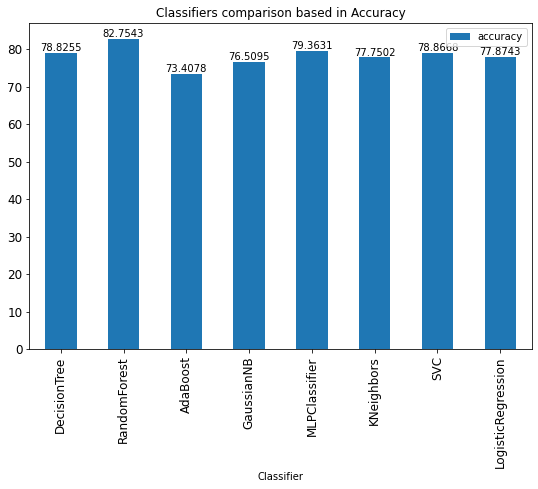

In [68]:
ax = models_performance_df[['Classifier', 'accuracy']].plot(kind='bar', x='Classifier',
                                                      title='Classifiers comparison based in Accuracy',
                                                      figsize=(9, 6), fontsize=12)
print(ax.bar_label(ax.containers[0]))

We trained 8 different machine learning models so that we can compare the accuracy as we can't rely on the results of just one model. It is always a best practice to compare the results. </br>


In [69]:
print(models_performance_df.sort_values(by='accuracy', ascending=False)[:1]['classification_report'].item())

              precision    recall  f1-score   support

    positive       0.82      0.91      0.86      1419
    negative       0.85      0.71      0.77       999

    accuracy                           0.83      2418
   macro avg       0.83      0.81      0.82      2418
weighted avg       0.83      0.83      0.82      2418



<b>The classification report gives us some detailes view on Precision, Recall and F1 score of each class. The report also shows the overall accuracy of the model.</b> </br>

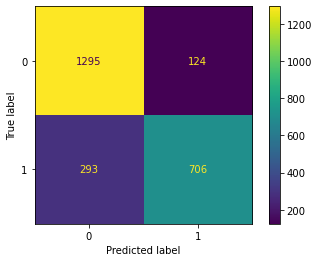

In [70]:
best_model = models_performance_df.sort_values(by='accuracy', ascending=False)[:1]['model'].item()
plot_confusion_matrix(best_model, X_test, y_test)  
plt.show()

<b> The confusion matrix helps us to view the total number of True Positive, True Negatives, False Positives and False Negatives. The gives a clear picture of both the classes for the number of correct and incorrect predictions made by the model. We have generated the confusion matrix for the best performing classifier above. </b>

# C1: Calculate additional features after (S2):

### C1 i) Shannon entropy of AA_window

We have created a deepcopy of the finale_merged_df.

In [71]:
entropy_df = copy.deepcopy(final_merged_df)

The below functions returns the shanon entropy value for each sequence. This has been calculated witih the help pf AA_window column.

In [72]:
def estimate_shannon_entropy(dna_sequence):
    bases = collections.Counter([tmp_base for tmp_base in dna_sequence])
    # define distribution
    dist = [x/sum(bases.values()) for x in bases.values()]
 
    # use scipy to calculate entropy
    entropy_value = entropy(dist, base=2)

    return entropy_value

In [73]:
entropy_df['entropy'] = entropy_df.AA_window.apply(lambda x: estimate_shannon_entropy(x))

In [74]:
entropy_df

,protein_id,epitope_id,AA_position,AA_window,class,entropy
0,AAB20743.1,114463,42,LKFFEIDLTSRPAHG,1,3.640224
1,AAB20743.1,114463,43,KFFEIDLTSRPAHGG,1,3.640224
2,AAB20743.1,114463,44,FFEIDLTSRPAHGGK,1,3.640224
3,AAB20743.1,114463,45,FEIDLTSRPAHGGKT,1,3.640224
4,AAB20743.1,114463,46,EIDLTSRPAHGGKTE,1,3.506891
...,...,...,...,...,...,...
10245,WP_033888368.1,523923,170,LSPYVSDLDLSEIDI,0,2.822580
10246,BAQ51774.1,517741,115,VFGWNHFLRQDSGKT,0,3.640224
10247,WP_032461108.1,518955,199,STATANGIPGLHFPT,0,3.189898
10248,KGE60983.1,527900,198,VPTPKAAETTEVEPK,0,2.555913


### C1 ii)  TMM  and  MHI of AA_window

The below data has been taken from https://www.imgt.org/IMGTeducation/Aide-memoire/_UK/aminoacids/abbreviation.html where we have a tables showing Amino acid abbreviations, characteristics, volume and hydropathy index. We have created a dictionary and taken relevant information only. 

In [75]:
molecular_hydropathy_dict = {'A': {'molecular_mass': 89, 'hydropathy_index': 1.8},
                        'R': {'molecular_mass': 174, 'hydropathy_index': -4.5},
                        'N': {'molecular_mass': 132, 'hydropathy_index': -3.5},
                        'D': {'molecular_mass': 133, 'hydropathy_index': -3.5},
                        'C': {'molecular_mass': 121, 'hydropathy_index': 2.5},
                        'Q': {'molecular_mass': 146, 'hydropathy_index': -3.5},
                        'E': {'molecular_mass': 147, 'hydropathy_index': -3.5},
                        'G': {'molecular_mass': 75, 'hydropathy_index': -0.4},
                        'H': {'molecular_mass': 155, 'hydropathy_index': -3.2},
                        'I': {'molecular_mass': 131, 'hydropathy_index': 4.5},
                        'L': {'molecular_mass': 131, 'hydropathy_index': 3.8},
                        'K': {'molecular_mass': 146, 'hydropathy_index': -3.9},
                        'M': {'molecular_mass': 149, 'hydropathy_index': 1.9},
                        'F': {'molecular_mass': 165, 'hydropathy_index': 2.8},
                        'P': {'molecular_mass': 115, 'hydropathy_index': -1.6},
                        'S': {'molecular_mass': 105, 'hydropathy_index': -0.8},
                        'T': {'molecular_mass': 119, 'hydropathy_index': -0.7},
                        'W': {'molecular_mass': 204, 'hydropathy_index': -0.9},
                        'Y': {'molecular_mass': 181, 'hydropathy_index': -1.3},
                        'V': {'molecular_mass': 117, 'hydropathy_index': 4.2}}

This function 'calculate_tmm_score' returns the <b> tmm </b> score where it adds the molecular_mass of each aminoacid letter present in the AA_window column.

In [76]:
def calculate_tmm_score(AA_window):
    sum_ = 0
    for i in AA_window:
        molecular_mass = molecular_hydropathy_dict.get(i).get('molecular_mass')
        sum_ += molecular_mass
    return sum_

In [77]:
entropy_df['TMM'] = entropy_df.AA_window.apply(lambda x: calculate_tmm_score(x))

In [78]:
entropy_df

,protein_id,epitope_id,AA_position,AA_window,class,entropy,TMM
0,AAB20743.1,114463,42,LKFFEIDLTSRPAHG,1,3.640224,1981
1,AAB20743.1,114463,43,KFFEIDLTSRPAHGG,1,3.640224,1925
2,AAB20743.1,114463,44,FFEIDLTSRPAHGGK,1,3.640224,1925
3,AAB20743.1,114463,45,FEIDLTSRPAHGGKT,1,3.640224,1879
4,AAB20743.1,114463,46,EIDLTSRPAHGGKTE,1,3.506891,1861
...,...,...,...,...,...,...,...
10245,WP_033888368.1,523923,170,LSPYVSDLDLSEIDI,0,2.822580,1929
10246,BAQ51774.1,517741,115,VFGWNHFLRQDSGKT,0,3.640224,2042
10247,WP_032461108.1,518955,199,STATANGIPGLHFPT,0,3.189898,1734
10248,KGE60983.1,527900,198,VPTPKAAETTEVEPK,0,2.555913,1847


The below function 'calculate_mhi_score' returns us the <b> MHI </b> calculated by takibge the mean of hydropathy_index of aminoacid letters present in the AA_window column.

In [79]:
def calculate_mhi_score(AA_window):
    val_list = list()
    for i in AA_window:
        hydropathy_ind = molecular_hydropathy_dict.get(i).get('hydropathy_index')
        val_list.append(hydropathy_ind)
    return np.mean(val_list)

In [80]:
entropy_df['MHI'] = entropy_df.AA_window.apply(lambda x: calculate_mhi_score(x))

In [81]:
entropy_df

,protein_id,epitope_id,AA_position,AA_window,class,entropy,TMM,MHI
0,AAB20743.1,114463,42,LKFFEIDLTSRPAHG,1,3.640224,1981,-0.173333
1,AAB20743.1,114463,43,KFFEIDLTSRPAHGG,1,3.640224,1925,-0.453333
2,AAB20743.1,114463,44,FFEIDLTSRPAHGGK,1,3.640224,1925,-0.453333
3,AAB20743.1,114463,45,FEIDLTSRPAHGGKT,1,3.640224,1879,-0.686667
4,AAB20743.1,114463,46,EIDLTSRPAHGGKTE,1,3.506891,1861,-1.106667
...,...,...,...,...,...,...,...,...
10245,WP_033888368.1,523923,170,LSPYVSDLDLSEIDI,0,2.822580,1929,0.353333
10246,BAQ51774.1,517741,115,VFGWNHFLRQDSGKT,0,3.640224,2042,-0.780000
10247,WP_032461108.1,518955,199,STATANGIPGLHFPT,0,3.189898,1734,0.073333
10248,KGE60983.1,527900,198,VPTPKAAETTEVEPK,0,2.555913,1847,-0.880000


In [82]:
entropy_df.shape

(10250, 8)

### C1 iii) Total number of Carbon, Hydrogen, Oxygen, Nitrogen and Sulphur atoms in AA_window.

The below data has been taken from https://www.dropbox.com/s/mz8tmta5kkxp2gn/Atoms.csv where we have a tables showing Amino acid AA Code and its Carbon, Hydrogen, Nitrogen, Oxygen and Sulphur value. We have created a dictionary and taken relevant information only.

In [83]:
atoms_info = {'A': {'Carbon': 3, 'Hydrogen': 7, 'Nitrogen': 1, 'Oxygen': 2, 'Sulphur': 0},
             'C': {'Carbon': 3, 'Hydrogen': 7, 'Nitrogen': 1, 'Oxygen': 2, 'Sulphur': 1},
             'D': {'Carbon': 4, 'Hydrogen': 7, 'Nitrogen': 1, 'Oxygen': 4, 'Sulphur': 0},
             'E': {'Carbon': 5, 'Hydrogen': 9, 'Nitrogen': 1, 'Oxygen': 4, 'Sulphur': 0},
             'F': {'Carbon': 9, 'Hydrogen': 11, 'Nitrogen': 1, 'Oxygen': 2, 'Sulphur': 0},
             'G': {'Carbon': 2, 'Hydrogen': 5, 'Nitrogen': 1, 'Oxygen': 2, 'Sulphur': 0},
             'H': {'Carbon': 6, 'Hydrogen': 9, 'Nitrogen': 3, 'Oxygen': 2, 'Sulphur': 0},
             'I': {'Carbon': 6, 'Hydrogen': 13, 'Nitrogen': 1, 'Oxygen': 2, 'Sulphur': 0},
             'K': {'Carbon': 6, 'Hydrogen': 14, 'Nitrogen': 2, 'Oxygen': 2, 'Sulphur': 0},
             'L': {'Carbon': 6, 'Hydrogen': 13, 'Nitrogen': 1, 'Oxygen': 2, 'Sulphur': 0},
             'M': {'Carbon': 5, 'Hydrogen': 11, 'Nitrogen': 1, 'Oxygen': 2, 'Sulphur': 1},
             'N': {'Carbon': 4, 'Hydrogen': 8, 'Nitrogen': 2, 'Oxygen': 3, 'Sulphur': 0},
             'P': {'Carbon': 5, 'Hydrogen': 9, 'Nitrogen': 1, 'Oxygen': 2, 'Sulphur': 0},
             'Q': {'Carbon': 5, 'Hydrogen': 10, 'Nitrogen': 2, 'Oxygen': 3, 'Sulphur': 0},
             'R': {'Carbon': 6, 'Hydrogen': 14, 'Nitrogen': 4, 'Oxygen': 2, 'Sulphur': 0},
             'S': {'Carbon': 3, 'Hydrogen': 7, 'Nitrogen': 1, 'Oxygen': 3, 'Sulphur': 0},
             'T': {'Carbon': 4, 'Hydrogen': 9, 'Nitrogen': 1, 'Oxygen': 3, 'Sulphur': 0},
             'V': {'Carbon': 5, 'Hydrogen': 11, 'Nitrogen': 1, 'Oxygen': 2, 'Sulphur': 0},
             'W': {'Carbon': 11, 'Hydrogen': 12, 'Nitrogen': 2, 'Oxygen': 2, 'Sulphur': 0},
             'Y': {'Carbon': 9, 'Hydrogen': 11, 'Nitrogen': 1, 'Oxygen': 3, 'Sulphur': 0}}

The below function 'calculate_chons_atome' returns us the sum of each atom values of aminoacid letter present in AA_window. 

In [84]:
def calculate_chons_atome(AA_window, atom=None):
    sum_ = 0
    for i in AA_window:
        atom_value = atoms_info.get(i).get(atom)
        sum_ += atom_value
    return sum_

In [85]:
entropy_df['Number_of_carbon'] = entropy_df.AA_window.apply(lambda x: calculate_chons_atome(x, 'Carbon'))
entropy_df['Number_of_hydrogen'] = entropy_df.AA_window.apply(lambda x: calculate_chons_atome(x, 'Hydrogen'))
entropy_df['Number_of_nitrpgen'] = entropy_df.AA_window.apply(lambda x: calculate_chons_atome(x, 'Nitrogen'))
entropy_df['Number_of_oxygen'] = entropy_df.AA_window.apply(lambda x: calculate_chons_atome(x, 'Oxygen'))
entropy_df['Number_of_sulphur'] = entropy_df.AA_window.apply(lambda x: calculate_chons_atome(x, 'Sulphur'))

In [86]:
entropy_df

,protein_id,epitope_id,AA_position,AA_window,class,entropy,TMM,MHI,Number_of_carbon,Number_of_hydrogen,Number_of_nitrpgen,Number_of_oxygen,Number_of_sulphur
0,AAB20743.1,114463,42,LKFFEIDLTSRPAHG,1,3.640224,1981,-0.173333,80,151,21,36,0
1,AAB20743.1,114463,43,KFFEIDLTSRPAHGG,1,3.640224,1925,-0.453333,76,143,21,36,0
2,AAB20743.1,114463,44,FFEIDLTSRPAHGGK,1,3.640224,1925,-0.453333,76,143,21,36,0
3,AAB20743.1,114463,45,FEIDLTSRPAHGGKT,1,3.640224,1879,-0.686667,71,141,21,37,0
4,AAB20743.1,114463,46,EIDLTSRPAHGGKTE,1,3.506891,1861,-1.106667,67,139,21,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10245,WP_033888368.1,523923,170,LSPYVSDLDLSEIDI,0,2.822580,1929,0.353333,75,147,15,42,0
10246,BAQ51774.1,517741,115,VFGWNHFLRQDSGKT,0,3.640224,2042,-0.780000,82,146,24,36,0
10247,WP_032461108.1,518955,199,STATANGIPGLHFPT,0,3.189898,1734,0.073333,66,130,18,35,0
10248,KGE60983.1,527900,198,VPTPKAAETTEVEPK,0,2.555913,1847,-0.880000,70,145,17,39,0


In [87]:
entropy_df.shape

(10250, 13)

# C2: Develop high-quality visualisations of the main characteristics of the results from (C1)

### C2 i) Atoms comparison for all Amino Acids Visualization

From the above tasks, we will analyze some characteristics of the results. </br>
We have compared the total of carbon, hyderogen, nitrogen, oxygen and sulphur present in the overall AA_window.

In [88]:
total_atoms_info_df = pd.DataFrame([{'Atom':'carbon', 'sum': entropy_df['Number_of_carbon'].sum()},
                                    {'Atom':'hydrogen', 'sum': entropy_df['Number_of_hydrogen'].sum()},
                                    {'Atom':'nitrogen', 'sum': entropy_df['Number_of_nitrpgen'].sum()},
                                    {'Atom':'oxygen', 'sum': entropy_df['Number_of_oxygen'].sum()},
                                    {'Atom':'sulphur', 'sum': entropy_df['Number_of_sulphur'].sum()}])

[Text(0, 0, '727430'),
 Text(0, 0, '1.48614e+06'),
 Text(0, 0, '206852'),
 Text(0, 0, '401858'),
 Text(0, 0, '1898')]

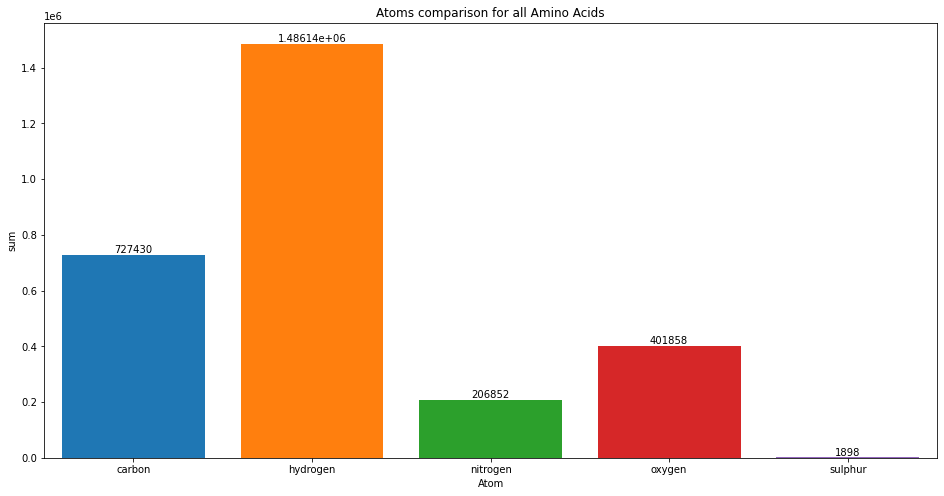

In [89]:
a4_dims = (16, 8)
fig, ax = plt.subplots(figsize=a4_dims)
ax.set_title('Atoms comparison for all Amino Acids')
ax.set_ylabel('Total Sum')
ax.set_xlabel('Atom')
sns.barplot(ax=ax, x="Atom", y="sum", data=total_atoms_info_df, estimator=sum, saturation=1)
ax.bar_label(ax.containers[0])

<b> It could be seen that, Hydrogen atoms are present in maximum quantity in our dataset followed by Carbon.
Also, the present is sulphur atoms is very little when compared to all the other atoms whereas Oxygen and Nitrogen atoms are also present in least amount when compared with Hydrogen and Carbon atoms.</b>

### C2 ii) Atoms comparison for each Amino Acid Visualization

In this, we have taken each individual aminoacid into account and compared the total number of Carbon, Hydrogen, Nitrogen, Oxygen and Sulphur atoms in the final processed dataset.

In [90]:
amino_acid_list = list()
amino_acid_count = dict(Counter(sorted([item for sublist in [list(i) for i in list(entropy_df.AA_window)] for item in sublist])))

for key, value in amino_acid_count.items():
    amino_dic_info = dict()
    amino_dic_info['Amino_Acid'] = key
    amino_dic_info['Carbon'] = value*atoms_info.get(key).get('Carbon')
    amino_dic_info['Hydrogen'] = value*atoms_info.get(key).get('Hydrogen')
    amino_dic_info['Nitrogen'] = value*atoms_info.get(key).get('Nitrogen')
    amino_dic_info['Oxygen'] = value*atoms_info.get(key).get('Oxygen')
    amino_dic_info['Sulphur'] = value*atoms_info.get(key).get('Sulphur')
    amino_acid_list.append(amino_dic_info)

amino_acid_atom_df = pd.DataFrame(amino_acid_list)

<AxesSubplot:title={'center':'Atoms comparison for each Amino Acid'}, xlabel='Amino Acid Letter', ylabel='Atom Weightage'>

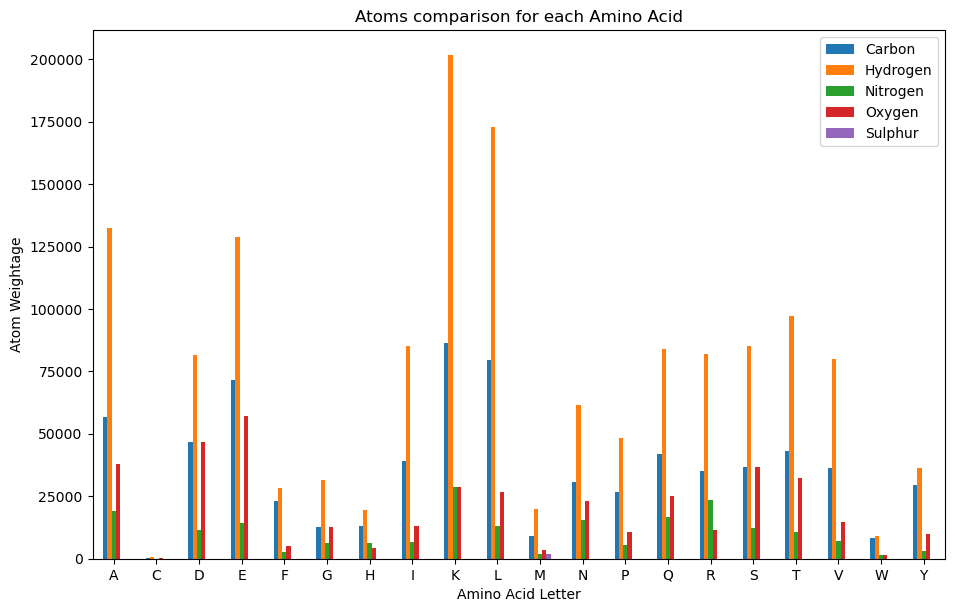

In [91]:
fig = plt.figure(figsize=(2,2), dpi=100)
ax = plt.subplot(111)
amino_acid_atom_df[['Amino_Acid','Carbon', 'Hydrogen', 'Nitrogen', 'Oxygen', 'Sulphur']].plot.bar(x='Amino_Acid', rot=0,  
                                                                                     figsize=(11, 7),
                                                                                     title='Atoms comparison for each Amino Acid',
                                                                                     ylabel='Atom Weightage', xlabel='Amino Acid Letter', ax=ax)

<b> We can see from the above bar plot that <b> K, L, A and E </b> have maximum number of all the atoms whereas <b> C, W, M, H and F </b> have least number of all of these atoms.</b>

### C2 iii) Molecular Mass comparison for each Amino Acid Visualization

In this viualization, we have taken each individual aminoacid into account and compared the total molecular_mass present in the final processed dataset.

In [92]:
mol_mass_hydro_ind_list = list()
amino_acid_count = dict(Counter(sorted([item for sublist in [list(i) for i in list(entropy_df.AA_window)] for item in sublist])))

for key, value in amino_acid_count.items():
    amino_dic_info = dict()
    amino_dic_info['Amino_Acid'] = key
    amino_dic_info['molecular_mass'] = value*molecular_hydropathy_dict.get(key).get('molecular_mass')
    mol_mass_hydro_ind_list.append(amino_dic_info)

mol_mass_hydro_ind_df = pd.DataFrame(mol_mass_hydro_ind_list)

<AxesSubplot:title={'center':'Molecular Mass comparison for each Amino Acid Visualization'}, xlabel='Amino Acid Letter', ylabel='Molecular Weight'>

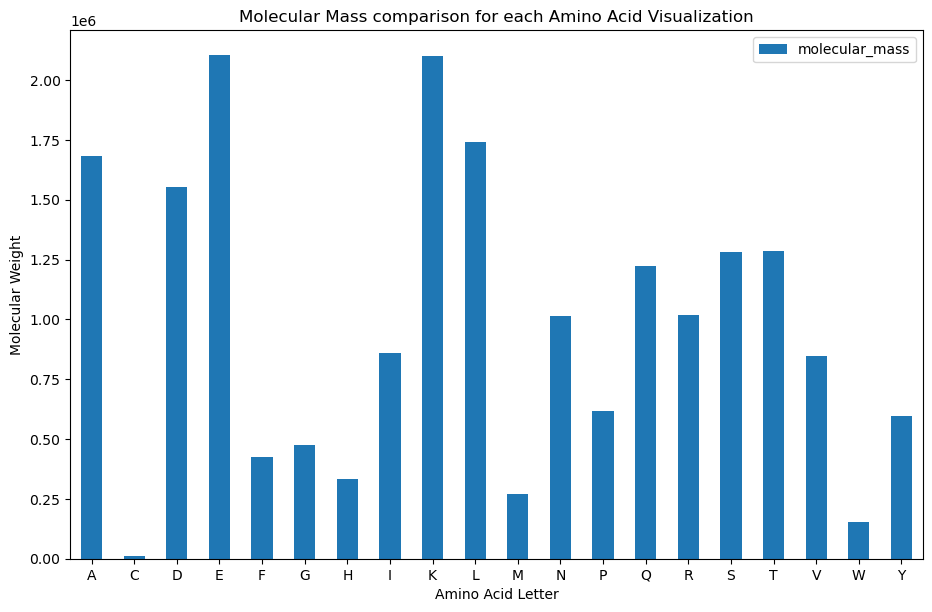

In [93]:
fig = plt.figure(figsize=(2,2), dpi=100)
ax = plt.subplot(111)
mol_mass_hydro_ind_df[['Amino_Acid','molecular_mass']].plot.bar(x='Amino_Acid', rot=0,  
                                                                                     figsize=(11, 7),
                                                                                     title='Molecular Mass comparison for each Amino Acid Visualization',
                                                                                     ylabel='Molecular Weight', xlabel='Amino Acid Letter', ax=ax)

<b> We can clearly see from the above bar plot that <b> K, L, A and E </b> have maximum molecular masss of all the atoms whereas <b> C, W, M, H and F </b> have least amount of molecular mass.</b>